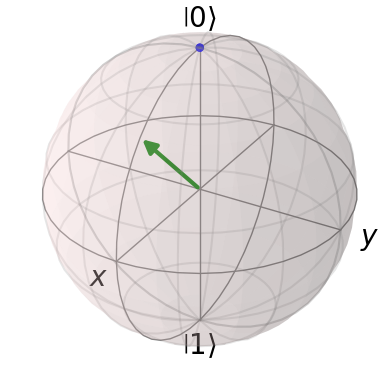

In [9]:
import numpy as np
import qutip
from matplotlib import pyplot, animation


# Function to calculate the Bloch vector from a quantum state
def state_to_bloch_vector(state):
    # Pauli matrices
    sx = qutip.sigmax()
    sy = qutip.sigmay()
    sz = qutip.sigmaz()

    # Calculate the expectation values <σx>, <σy>, <σz>
    bloch_x = qutip.expect(sx, state)
    bloch_y = qutip.expect(sy, state)
    bloch_z = qutip.expect(sz, state)

    # Return the Bloch vector (x, y, z)
    return [bloch_x, bloch_y, bloch_z]


# Function to animate the Bloch sphere with a list of states
def animate_bloch_trajectory(
    states, theta=np.pi / 4
):  # Define theta here (e.g., 45 degrees)
    # Create the figure and 3D plot
    fig = pyplot.figure()
    ax = fig.add_subplot(projection="3d")
    sphere = qutip.Bloch(axes=ax)

    # Convert each state to a Bloch vector
    bloch_vectors = [state_to_bloch_vector(qutip.Qobj(state)) for state in states]

    # Define the update function for animation
    def animate(i):
        sphere.clear()
        # Add a reference vector in the direction of theta (optional)
        sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
        # Add the trajectory points up to step i
        sphere.add_points([bv[: i + 1] for bv in zip(*bloch_vectors)])
        sphere.make_sphere()
        return ax

    # Create the animation
    ani = animation.FuncAnimation(
        fig, animate, frames=len(bloch_vectors), blit=False, repeat=False
    )

    # Save the animation as an mp4 file
    ani.save("bloch_sphere_trajectory.mp4", fps=20)


# Example: List of quantum states to animate
def create_test_states():
    from qutip import basis

    # |0> state
    initial_state = basis(2, 0).full()

    # Superposition state
    superposition_state = (basis(2, 0) + basis(2, 1)).unit().full()

    # |1> state
    final_state = basis(2, 1).full()

    return [initial_state, superposition_state, final_state]


# List of quantum states
states = create_test_states()

# Animate the trajectory of these states
animate_bloch_trajectory(states)